In [1]:
import pandas as pd
import numpy as np
# Caricamento del dataset

file_path = "/Users/GiuliaTacaca/Downloads/owid-covid-data.csv"
df = pd.read_csv(file_path)

# Imposto Pandas per mostrare tutte le righe e colonne

pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.width', None)  # Impedisce la limitazione della larghezza
pd.set_option('display.max_colwidth', None)  # Mostra contenuti di tutte le colonne

print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           0.0         0.0                  NaN   
1                 NaN           0.0         0.0                  NaN   
2                 NaN           0.0         0.0                  NaN   
3                 NaN           0.0         0.0                  NaN   
4                 NaN           0.0         0.0                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                      0.0                    0.0   
1                     

In [40]:
# Analisi delle dimensioni del dataset e dei metadati
def dataset_info(dataframe):
    print(dataframe.shape)
    print(dataframe.info())
    print(dataframe.describe(include='all'))

dataset_info(df)

(429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [4]:
print(df.describe(include='all'))

        iso_code continent               location        date   total_cases  \
count     429435    402910                 429435      429435  4.118040e+05   
unique       255         6                    255        1688           NaN   
top     OWID_HIC    Africa  High-income countries  2022-01-10           NaN   
freq        3026     95419                   3026         261           NaN   
mean         NaN       NaN                    NaN         NaN  7.365292e+06   
std          NaN       NaN                    NaN         NaN  4.477582e+07   
min          NaN       NaN                    NaN         NaN  0.000000e+00   
25%          NaN       NaN                    NaN         NaN  6.280750e+03   
50%          NaN       NaN                    NaN         NaN  6.365300e+04   
75%          NaN       NaN                    NaN         NaN  7.582720e+05   
max          NaN       NaN                    NaN         NaN  7.758668e+08   

           new_cases  new_cases_smoothed  total_dea

In [5]:
# Conto quante righe duplicate ci sono
print(df.duplicated().sum()) 

0


In [6]:
# Trovo e correggo errori di Dtype
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Converte in formato data il Dtype

In [7]:
#Controllo i valori nulli per ogni colonna
#print(df.isnull().sum())
df_pulito = df.dropna(subset=['total_cases'])
print(df_pulito.isnull().sum())


iso_code                                           0
continent                                      20088
location                                           0
date                                               0
total_cases                                        0
new_cases                                       1645
new_cases_smoothed                              2875
total_deaths                                       0
new_deaths                                      1196
new_deaths_smoothed                             2426
total_cases_per_million                            0
new_cases_per_million                           1645
new_cases_smoothed_per_million                  2875
total_deaths_per_million                           0
new_deaths_per_million                          1196
new_deaths_smoothed_per_million                 2426
reproduction_rate                             228697
icu_patients                                  376996
icu_patients_per_million                      

In [8]:
#2
#df_pulito = df.dropna(subset=['total_cases'])

# Filtro le colonne necessarie, raggruppo per continente e sommo i casi totali
df_filtrato = df_pulito[['continent', 'total_cases']]
tot_casi_per_continente = df_filtrato.groupby('continent')['total_cases'].max()  

tot_casi_mondiali = df_pulito['total_cases'].max()

# Calcolo la percentuale di casi per ciascun continente rispetto al totale mondiale 
percentuale_per_continente = (tot_casi_per_continente / tot_casi_mondiali) * 100

# Unisco i due risultati in un DataFrame
result = pd.DataFrame({
    'Totale Casi': tot_casi_per_continente,
    'Percentuale rispetto al totale mondiale': percentuale_per_continente
})

print(result)

               Totale Casi  Percentuale rispetto al totale mondiale
continent                                                          
Africa           4072765.0                                 0.524931
Asia            99373219.0                                12.808026
Europe          38997490.0                                 5.026313
North America  103436829.0                                13.331777
Oceania         11861161.0                                 1.528763
South America   37511921.0                                 4.834840


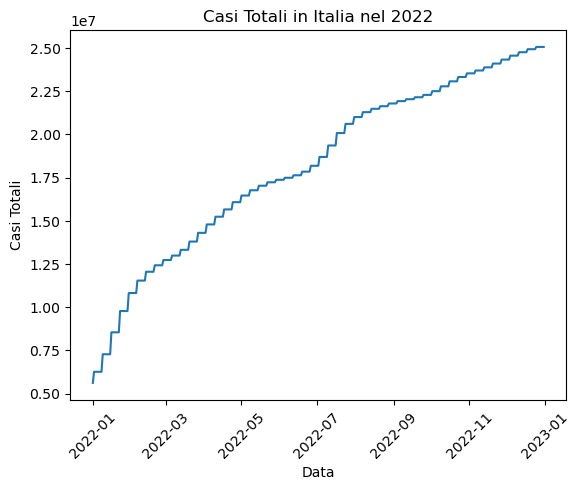

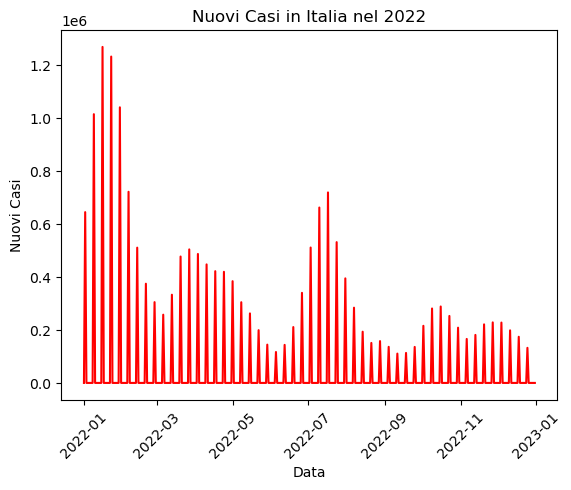

In [9]:
#3
import matplotlib.pyplot as plt

# Filtro i dati per l'Italia nel 2022
df_italy_2022 = df_pulito[(df_pulito['location'] == 'Italy') & (df_pulito['date'].dt.year == 2022)]

# Grafico 1: Casi totali in Italia nel 2022
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'])
plt.title('Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.show()

# Grafico 2: Nuovi casi in Italia nel 2022
plt.plot(df_italy_2022['date'], df_italy_2022['new_cases'], color='red')
plt.title('Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

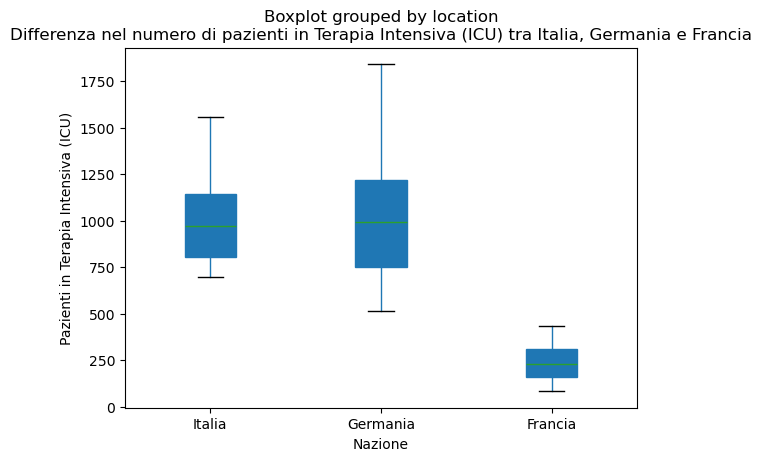

In [13]:
#4
#Filtro per Italia, Germania e <Francia
df_IGF = df_pulito[(df_pulito['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (df_pulito['date'] >= '2022-05-01') & 
                 (df_pulito['date'] <= '2023-04-30')]

# Rimuovo i Nan per i pazienti in terapia intensiva
df_IGF = df_IGF.dropna(subset=['icu_patients'])

#Boxplot
plt.figure(figsize=(10, 6))
df_IGF.boxplot(by='location', column=['icu_patients'], grid=False, patch_artist=True)

plt.title('Differenza nel numero di pazienti in Terapia Intensiva tra Italia, Germania e Francia')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.xticks([1, 2, 3], ['Italia', 'Germania', 'Francia'])

plt.show()

Somma dei pazienti nel 2021 per nazione:
location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


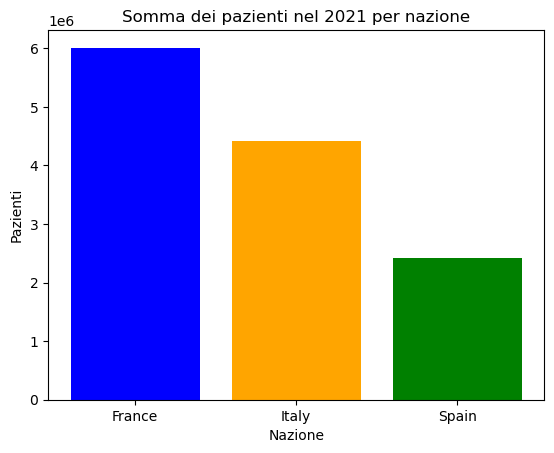

" \nDall'analisi che ho fatto possiamo notare che la Germania nel periodo indicato non \n"

In [38]:
#5
#Filtro Italia, Germania, Francia e Spagna nel 2021
df_21_IGFS = df_pulito[(df_pulito['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
             (df_pulito['date'].dt.year == 2021)]

# Rimuovo le righe dove la colonna 'hosp_patients' è NaN 
df_21_IGFS_clean = df_21_IGFS.dropna(subset=['hosp_patients'])

# Somma dei pazienti per ciascun paese
somma_pazienti = df_21_IGFS_clean.groupby('location')['hosp_patients'].sum()

print("Somma dei pazienti nel 2021 per nazione:")
print(somma_pazienti)

# Grafico della somma dei pazienti
plt.bar(somma_pazienti.index, somma_pazienti.values, color=['blue', 'orange', 'green', 'red'])
plt.title('Somma dei pazienti nel 2021 per nazione')
plt.xlabel('Nazione')
plt.ylabel('Pazienti')
plt.show()

""" 
Sono presenti dati nulli per la Germania e potremmo sostituirli con i valori della media o della mediana,
ma non sappiamo se durante questo periodo non ci sono state effettivamente misurazioni.

